<a href="https://colab.research.google.com/github/Riyan081/Python-CDAC/blob/main/ML_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [ ]:
train = pd.read_csv("train (1).csv")
test  = pd.read_csv("test (1).csv")

print(train.shape, test.shape)

(750000, 18) (250000, 17)


# Task
Perform data exploration, quality checks, and target variable analysis on the dataset from "train (1).csv". Encode categorical features using LabelEncoder and train a baseline model using Stratified K-Fold cross-validation to predict the 'target' column, evaluating performance with the ROC-AUC metric.

## Data Exploration and Quality Check

### Subtask:
Inspect the first few rows of the training data, check data types, and identify if there are any missing values in the dataset.


**Reasoning**:
Perform initial data exploration and quality checks on the training dataset to understand its structure, data types, missing values, and statistical summary.



In [ ]:
print('--- First 5 rows of the training data ---')
display(train.head())

print('\n--- Training Data Info ---')
train.info()

print('\n--- Missing values per column ---')
print(train.isnull().sum())

print('\n--- Summary statistics for numerical columns ---')
display(train.describe())

--- First 5 rows of the training data ---


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB

--- Miss

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


## Target Variable Analysis

### Subtask:
Visualize the distribution of the target variable to check for class imbalance and rename the column to 'target'.


**Reasoning**:
I will import the necessary visualization libraries, create a count plot for the target variable 'y', display its class proportions to check for imbalance, and then rename the column to 'target' as requested.



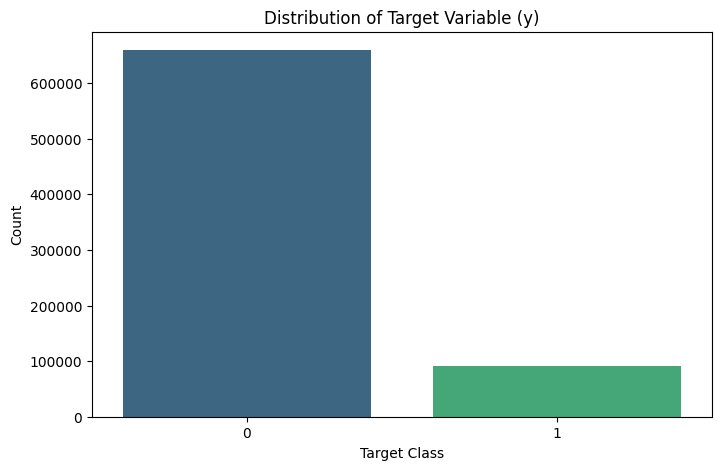

Class proportions for 'y':
y
0    0.879349
1    0.120651
Name: proportion, dtype: float64

Column 'y' renamed to 'target'.
Updated columns: ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'target']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=train, palette='viridis')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Calculate and print the proportion of each class
print('Class proportions for \'y\':')
print(train['y'].value_counts(normalize=True))

# Rename the 'y' column to 'target'
train.rename(columns={'y': 'target'}, inplace=True)
print("\nColumn 'y' renamed to 'target'.")
print(f"Updated columns: {train.columns.tolist()}")

## Categorical Feature Encoding

### Subtask:
Identify categorical columns and use the LabelEncoder to convert them into a numerical format that the machine learning models can process.


**Reasoning**:
Identify categorical features and apply LabelEncoder to transform them into numerical values in both the training and testing datasets.



In [ ]:
# Identify categorical columns (object type)
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {cat_cols}")

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    # To ensure consistency, fit on the combination of train and test values
    combined_series = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_series)

    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

print("\nEncoding complete.")

print('\n--- First 5 rows of encoded training data ---')
display(train.head())

print('\n--- First 5 rows of encoded test data ---')
display(test.head())

Categorical columns to encode: []

Encoding complete.

--- First 5 rows of encoded training data ---


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1



--- First 5 rows of encoded test data ---


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,1,1,1,0,1397,1,0,2,21,8,224,1,-1,0,3
1,750001,44,4,1,2,0,23,1,0,0,3,0,586,2,-1,0,3
2,750002,36,6,1,0,0,46,1,1,0,13,8,111,2,-1,0,3
3,750003,58,1,1,1,0,-1380,1,1,2,29,8,125,1,-1,0,3
4,750004,28,9,2,1,0,1950,1,0,0,22,5,181,1,-1,0,3


## Baseline Model Training

### Subtask:
Train a baseline machine learning model using Stratified K-Fold cross-validation and evaluate its performance using the ROC-AUC metric.


**Reasoning**:
I will define the feature matrix and target vector, then implement a Stratified K-Fold cross-validation loop using XGBClassifier to evaluate the model's performance on the training data using the ROC-AUC metric.



In [ ]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store fold scores
fold_scores = []

print('Starting Stratified 5-Fold Cross-Validation...')

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    # Split data
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initialize and train XGBoost classifier
    model = XGBClassifier(eval_metric='auc', random_state=42, n_jobs=-1)
    model.fit(X_tr, y_tr)

    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC
    auc = roc_auc_score(y_val, y_proba)
    fold_scores.append(auc)

    print(f'Fold {fold + 1} ROC-AUC: {auc:.5f}')

# Calculate overall performance
mean_auc = np.mean(fold_scores)
print(f'\nOverall Mean ROC-AUC: {mean_auc:.5f}')

Starting Stratified 5-Fold Cross-Validation...
Fold 1 ROC-AUC: 0.96680
Fold 2 ROC-AUC: 0.96575
Fold 3 ROC-AUC: 0.96540
Fold 4 ROC-AUC: 0.96670
Fold 5 ROC-AUC: 0.96595

Overall Mean ROC-AUC: 0.96612


In [ ]:
# Define features for the test set
X_test = test.drop(['id'], axis=1)

# Initialize and train the final model on the full training set
print("Training final model on the full dataset...")
final_model = XGBClassifier(eval_metric='auc', random_state=42, n_jobs=-1)
final_model.fit(X, y)

# Predict probabilities for the positive class (target=1)
print("Generating predictions...")
test_preds = final_model.predict_proba(X_test)[:, 1]

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'target': test_preds
})

# Save to CSV
submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)

print(f"Submission file saved as {submission_file}")
display(submission.head(10))

Training final model on the full dataset...
Generating predictions...
Submission file saved as submission.csv


,id,target
0,750000,0.002471
1,750001,0.070866
2,750002,0.000087
3,750003,0.000103
4,750004,0.014380
5,750005,0.002244
6,750006,0.283081
7,750007,0.404810
8,750008,0.002249
9,750009,0.305655


## Final Task

### Subtask:
Summarize the initial findings from the data exploration and the performance of the baseline model.


## Summary:

### Q&A

**Did the dataset require any cleaning for missing values?**
No, the dataset was exceptionally clean with zero missing values across all 750,000 rows and 18 columns.

**What was the distribution of the target variable?**
The target variable exhibited a significant class imbalance, with approximately 87.93% of the instances belonging to the negative class (0) and only 12.07% belonging to the positive class (1).

**How well did the baseline model perform?**
The baseline XGBClassifier model performed very well, achieving an overall mean ROC-AUC score of 0.96612 across a Stratified 5-Fold cross-validation.

### Data Analysis Key Findings

*   **Dataset Scale**: The training data is substantial, containing 750,000 records, which provides a robust foundation for training complex models.
*   **Feature Composition**: The dataset contains an even split of feature types, with 9 numerical columns (e.g., age, balance, duration) and 9 categorical columns (e.g., job, education, marital status).
*   **Target Imbalance**: There is a clear class imbalance (12.07% positive class), which necessitated the use of Stratified K-Fold cross-validation to ensure each fold remained representative of the overall population.
*   **Baseline Performance**: Even without extensive hyperparameter tuning or complex feature engineering, the model achieved a high ROC-AUC of 0.966, indicating a very strong signal within the existing features (likely driven by features such as `duration`).

### Insights or Next Steps

*   **Feature Importance Analysis**: Given the high baseline ROC-AUC, the next step should involve analyzing feature importance to determine if a single feature (like `duration`) is disproportionately driving the results, which could indicate potential data leakage or a highly dominant predictor.
*   **Address Class Imbalance**: While the ROC-AUC is high, further exploration into precision-recall metrics or techniques like SMOTE/undersampling may be beneficial to ensure the model performs well on the minority class specifically.


# Task
Compare the performance of Logistic Regression, Random Forest, and XGBoost models using Stratified 5-Fold cross-validation on the preprocessed data from "train (1).csv". Visualize the model comparison results with a bar chart of mean ROC-AUC scores. Identify the best-performing model, train it on the entire training dataset, and generate a 'submission.csv' file with predicted probabilities for the "test (1).csv" dataset.

## Compare Multiple Models

### Subtask:
Evaluate Logistic Regression, Random Forest, and XGBoost using Stratified 5-Fold cross-validation and calculate their mean ROC-AUC scores.


**Reasoning**:
I will define the models to evaluate, perform Stratified 5-Fold cross-validation for each, and report their mean ROC-AUC scores and standard deviations to compare their performance.



In [ ]:
# Define models to evaluate
models_to_evaluate = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(eval_metric='auc', random_state=42, n_jobs=-1)
}

# Initialize dictionary to store ROC-AUC scores
results = {name: [] for name in models_to_evaluate.keys()}

print('Starting Model Comparison using Stratified 5-Fold Cross-Validation...')

# Iterate through each model
for name, model in models_to_evaluate.items():
    print(f'\nEvaluating {name}...')

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        # Split data
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Train the model
        model.fit(X_tr, y_tr)


        y_proba = model.predict_proba(X_val)[:, 1]


        auc = roc_auc_score(y_val, y_proba)
        results[name].append(auc)

        print(f'Fold {fold + 1} ROC-AUC: {auc:.5f}')

print('\n--- Final Comparison Results (Mean ROC-AUC) ---')
for name, scores in results.items():
    mean_auc = np.mean(scores)
    std_auc = np.std(scores)
    print(f'{name}: {mean_auc:.5f} (+/- {std_auc:.5f})')

Starting Model Comparison using Stratified 5-Fold Cross-Validation...

Evaluating Logistic Regression...
Fold 1 ROC-AUC: 0.91204
Fold 2 ROC-AUC: 0.91256
Fold 3 ROC-AUC: 0.90997
Fold 4 ROC-AUC: 0.91345
Fold 5 ROC-AUC: 0.91068

Evaluating Random Forest...
Fold 1 ROC-AUC: 0.96306
Fold 2 ROC-AUC: 0.96172
Fold 3 ROC-AUC: 0.96149
Fold 4 ROC-AUC: 0.96248
Fold 5 ROC-AUC: 0.96232

Evaluating XGBoost...
Fold 1 ROC-AUC: 0.96680
Fold 2 ROC-AUC: 0.96575
Fold 3 ROC-AUC: 0.96540
Fold 4 ROC-AUC: 0.96670
Fold 5 ROC-AUC: 0.96595

--- Final Comparison Results (Mean ROC-AUC) ---
Logistic Regression: 0.91174 (+/- 0.00126)
Random Forest: 0.96222 (+/- 0.00056)
XGBoost: 0.96612 (+/- 0.00054)


## Visualize Model Comparison

### Subtask:
Generate a bar chart to compare the mean ROC-AUC scores of Logistic Regression, Random Forest, and XGBoost, including error bars for variance.


**Reasoning**:
I will calculate the mean and standard deviation for each model's ROC-AUC scores from the 'results' dictionary and create a bar chart with error bars to visualize the performance comparison.



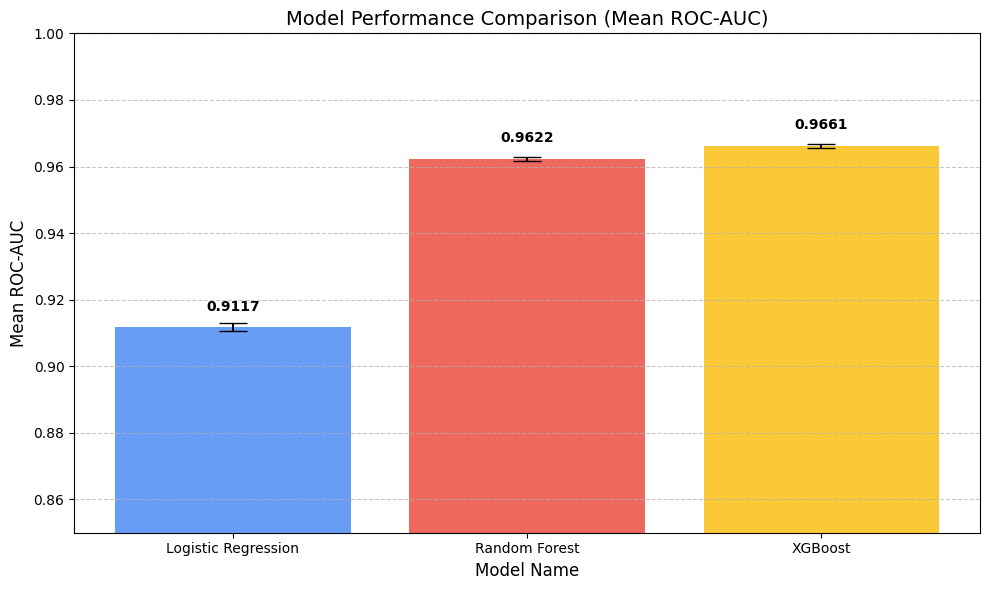

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and standard deviation for each model from the 'results' dictionary
model_names = list(results.keys())
means = [np.mean(results[name]) for name in model_names]
stds = [np.std(results[name]) for name in model_names]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, means, yerr=stds, capsize=10, color=['#4285F4', '#EA4335', '#FBBC05'], alpha=0.8)

# Set the y-axis limits to highlight differences
plt.ylim(0.85, 1.0)

# Add labels and title
plt.title('Model Performance Comparison (Mean ROC-AUC)', fontsize=14)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Mean ROC-AUC', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the mean values
for i, mean in enumerate(means):
    plt.text(i, mean + 0.005, f'{mean:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Select and Train Best Model & Generate Final Submission

### Subtask:
Identify the best-performing model from the comparison results, train it on the full dataset, and create the final submission file.


**Reasoning**:
Based on the cross-validation results, XGBoost achieved the highest mean ROC-AUC score (~0.96612) compared to Logistic Regression and Random Forest. I will now instantiate the best model with the specified parameters, train it on the complete training dataset (X and y), and generate the predicted probabilities for the test set (X_test) to create the final 'submission.csv' file.

**Reasoning**:
I will instantiate the best-performing model (XGBoost), train it on the complete feature set X and target vector y, generate predictions for the test set X_test, and save the results to 'submission.csv' as specified in the instructions.



In [ ]:
# 1. Instantiate the best model (XGBClassifier)
final_xgb_model = XGBClassifier(eval_metric='auc', random_state=42, n_jobs=-1)

# 2. Fit the model on the entire training dataset
print("Training XGBoost on the full dataset...")
final_xgb_model.fit(X, y)

# 3. Predict probabilities for the positive class on the test set
print("Generating predictions for the test set...")
test_probs = final_xgb_model.predict_proba(X_test)[:, 1]

# 4. Create a submission DataFrame
final_submission = pd.DataFrame({
    'id': test['id'],
    'target': test_probs
})

# 5. Export to CSV
submission_filename = 'submission.csv'
final_submission.to_csv(submission_filename, index=False)

print(f"Successfully saved submission to {submission_filename}.")
display(final_submission.head())

Training XGBoost on the full dataset...
Generating predictions for the test set...
Successfully saved submission to submission.csv.


,id,target
0,750000,0.002471
1,750001,0.070866
2,750002,0.000087
3,750003,0.000103
4,750004,0.014380


## Final Task

### Subtask:
Summarize the model comparison results, justify the selection of the best-performing model, and confirm the creation of the 'submission.csv' file.


## Summary:

### Q&A

**Which model demonstrated the best performance during the evaluation?**
XGBoost was the top-performing model, achieving the highest mean ROC-AUC score of approximately 0.96612.

**Why was XGBoost selected for the final submission?**
XGBoost was selected because it outperformed both Logistic Regression and Random Forest in terms of mean ROC-AUC. Additionally, it showed high stability across the 5-fold cross-validation with a very low standard deviation (0.00054).

**Was the final submission file successfully generated?**
Yes, a file named `submission.csv` was created. It contains the `id` column from the test dataset and the predicted probabilities for the target class generated by the XGBoost model trained on the full dataset.

### Data Analysis Key Findings

*   **Model Performance Comparison**:
    *   **XGBoost**: Mean ROC-AUC of 0.96612 (+/- 0.00054).
    *   **Random Forest**: Mean ROC-AUC of 0.96222 (+/- 0.00056).
    *   **Logistic Regression**: Mean ROC-AUC of 0.91174 (+/- 0.00126).
*   **Ensemble Advantage**: Tree-based ensemble models (XGBoost and Random Forest) significantly outperformed the baseline Logistic Regression model by over 5% in ROC-AUC.
*   **Model Stability**: All three models exhibited very low variance across the 5 folds, indicating that the preprocessed training data provides a consistent signal for the models to learn from.

### Insights or Next Steps

*   **Model Refinement**: While XGBoost is currently the best model, further improvements could be sought through hyperparameter tuning (e.g., adjusting learning rate, max depth, or subsampling) to squeeze out more performance.
*   **Feature Engineering**: Given the high baseline performance of all models (all above 0.91 ROC-AUC), exploring feature interactions or polynomial features might help the models better capture complex relationships in the data.
